# Grover's algorithm (two-solution oracle)

In [1]:
from openql import openql as ql
from utils import simulate, plot_histogram, random_state

In [2]:
ql.initialize()
compiler = ql.Compiler("compiler", "./config/compiler-config.json")

platform = ql.Platform("platform", "none")
platform.set_compiler(compiler=compiler)


In [3]:
# choose two fixed winners
winner1 = "100"
winner2 = "111"


In [4]:
program = ql.Program("grovers-double", platform=platform, qubit_count=3)
k = ql.Kernel("grd-kernel", platform=platform, qubit_count=3)

for qubit in range(3):
    k.hadamard(qubit)

# oracle for winners: 100 and 111
k.z(0)
k.cz(0, 1)
k.cz(0, 2)

# amplification
for qubit in range(3):
    k.hadamard(qubit)
    k.x(qubit)

k.hadamard(0)
k.toffoli(2, 1, 0)
k.hadamard(0)

for qubit in range(3):
    k.x(qubit)
    k.hadamard(qubit)

# measurements
for qubit in range(3):
    k.measure(qubit)

program.add_kernel(k)
program.compile()

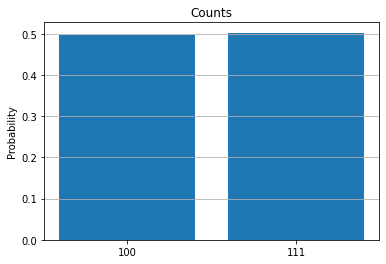

In [6]:
counts = simulate(program=program, shots=1024)

plot_histogram(counts)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dedd1051-cb34-4841-b8e5-79089caae121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>